In [1]:
# Install Biopython on JupyterLab

!pip install Biopython


In [1]:
# Load modules and import libraries needed

import Bio as Bio

from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo

from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [2]:
# Aligned files needed for parsing, changed to profile msa
# Because using locally installed software alignment tools i.e ClustalW or MUSCLE with a commandline wrapper takes too much computational time 
# and resources, we have input the FASTA files into an online multiple sequence aligner MAFFT. Once an alignment is generated, 
# we then used a profile-MSA by adding the mystery FASTA for another alignment. This is the saved .aln file we will be using

msa = r"C:\Users\neil_\Documents\GitHub\dog-genomics\data\mafft_alignments\second_MSA.aln"


In [3]:
for sequences in SeqIO.parse(msa, "clustal"):
    print(sequences.id)
    print(repr(sequences.seq))
    print(len(sequences))

gb|CM023446.1|
Seq('GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAAGATGAGTCGC...TAA')
16755
gb|MW916043.1|
Seq('GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAAGATGAGTCGC...TAA')
16755
gb|MW916029.1|
Seq('GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAAGATGAGTCGC...TAA')
16755
gb|MW916019.1|
Seq('GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAAGATGAGTCGC...TAA')
16755
gb|MW916050.1|
Seq('GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAAGATGAGTCGC...TAA')
16755
gb|MW916030.1|
Seq('GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAAGATGAGTCGC...TAA')
16755
gb|DQ480498.1|
Seq('GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAAGATGAGTCGC...TAA')
16755
gb|KU290784.1|
Seq('GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAAGATGAGTCGC...TAA')
16755
gb|KU290805.1|
Seq('GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAAGATGAGTCGC...TAA')
16755
gb|KU290571.1|
Seq('GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAAGATGAGTCGC...TAA')
16755
gb|KU290872.1|
Seq('GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAAGATGAGTCGC...TAA')
16755
gb|KU290707.1|
Seq('G

In [4]:
type(sequences)

Bio.SeqRecord.SeqRecord

In [3]:
# Generate alignment file output and check details

read_aln = AlignIO.read(msa, "clustal")

# Add test to see if there is a file
#print(read_aln)

#for aln in read_aln:
#    print(aln)

In [6]:
type(read_aln)

Bio.Align.MultipleSeqAlignment

In [4]:
# DNA distance calculator

cal_dist = DistanceCalculator("identity")

In [5]:
dm = cal_dist.get_distance(read_aln)

In [9]:
type(dm)

Bio.Phylo.TreeConstruction.DistanceMatrix

In [10]:
print(dm)

gb|CM023446.1|	0
gb|MW916043.1|	0.001313040883318406	0
gb|MW916029.1|	0.0013727245598328386	5.9683676514432626e-05	0
gb|MW916019.1|	0.0014324082363473822	0.0003581020590868178	0.00041778573560136145	0
gb|MW916050.1|	0.0014920919128618149	0.00041778573560136145	0.0004774694121157941	0.0001790510295434089	0
gb|MW916030.1|	0.0017905102954342	0.0009549388242315882	0.0008952551477170445	0.001313040883318406	0.0013727245598328386	0
gb|DQ480498.1|	0.001969561324977609	0.0011936735302894297	0.0012533572068039733	0.0015517755893763585	0.0016114592658907911	0.0010743061772605644	0
gb|KU290784.1|	0.0014920919128618149	0.00041778573560136145	0.00041778573560136145	0.0005371530886302267	0.0005968367651447704	0.001313040883318406	0.0016114592658907911	0
gb|KU290805.1|	0.0015517755893763585	0.0004774694121157941	0.0004774694121157941	0.0005968367651447704	0.000656520441659203	0.0013727245598328386	0.0016711429424052238	5.9683676514432626e-05	0
gb|KU290571.1|	0.0015517755893763585	0.000358102059086817

In [6]:
constructor = DistanceTreeConstructor(cal_dist)

constructor

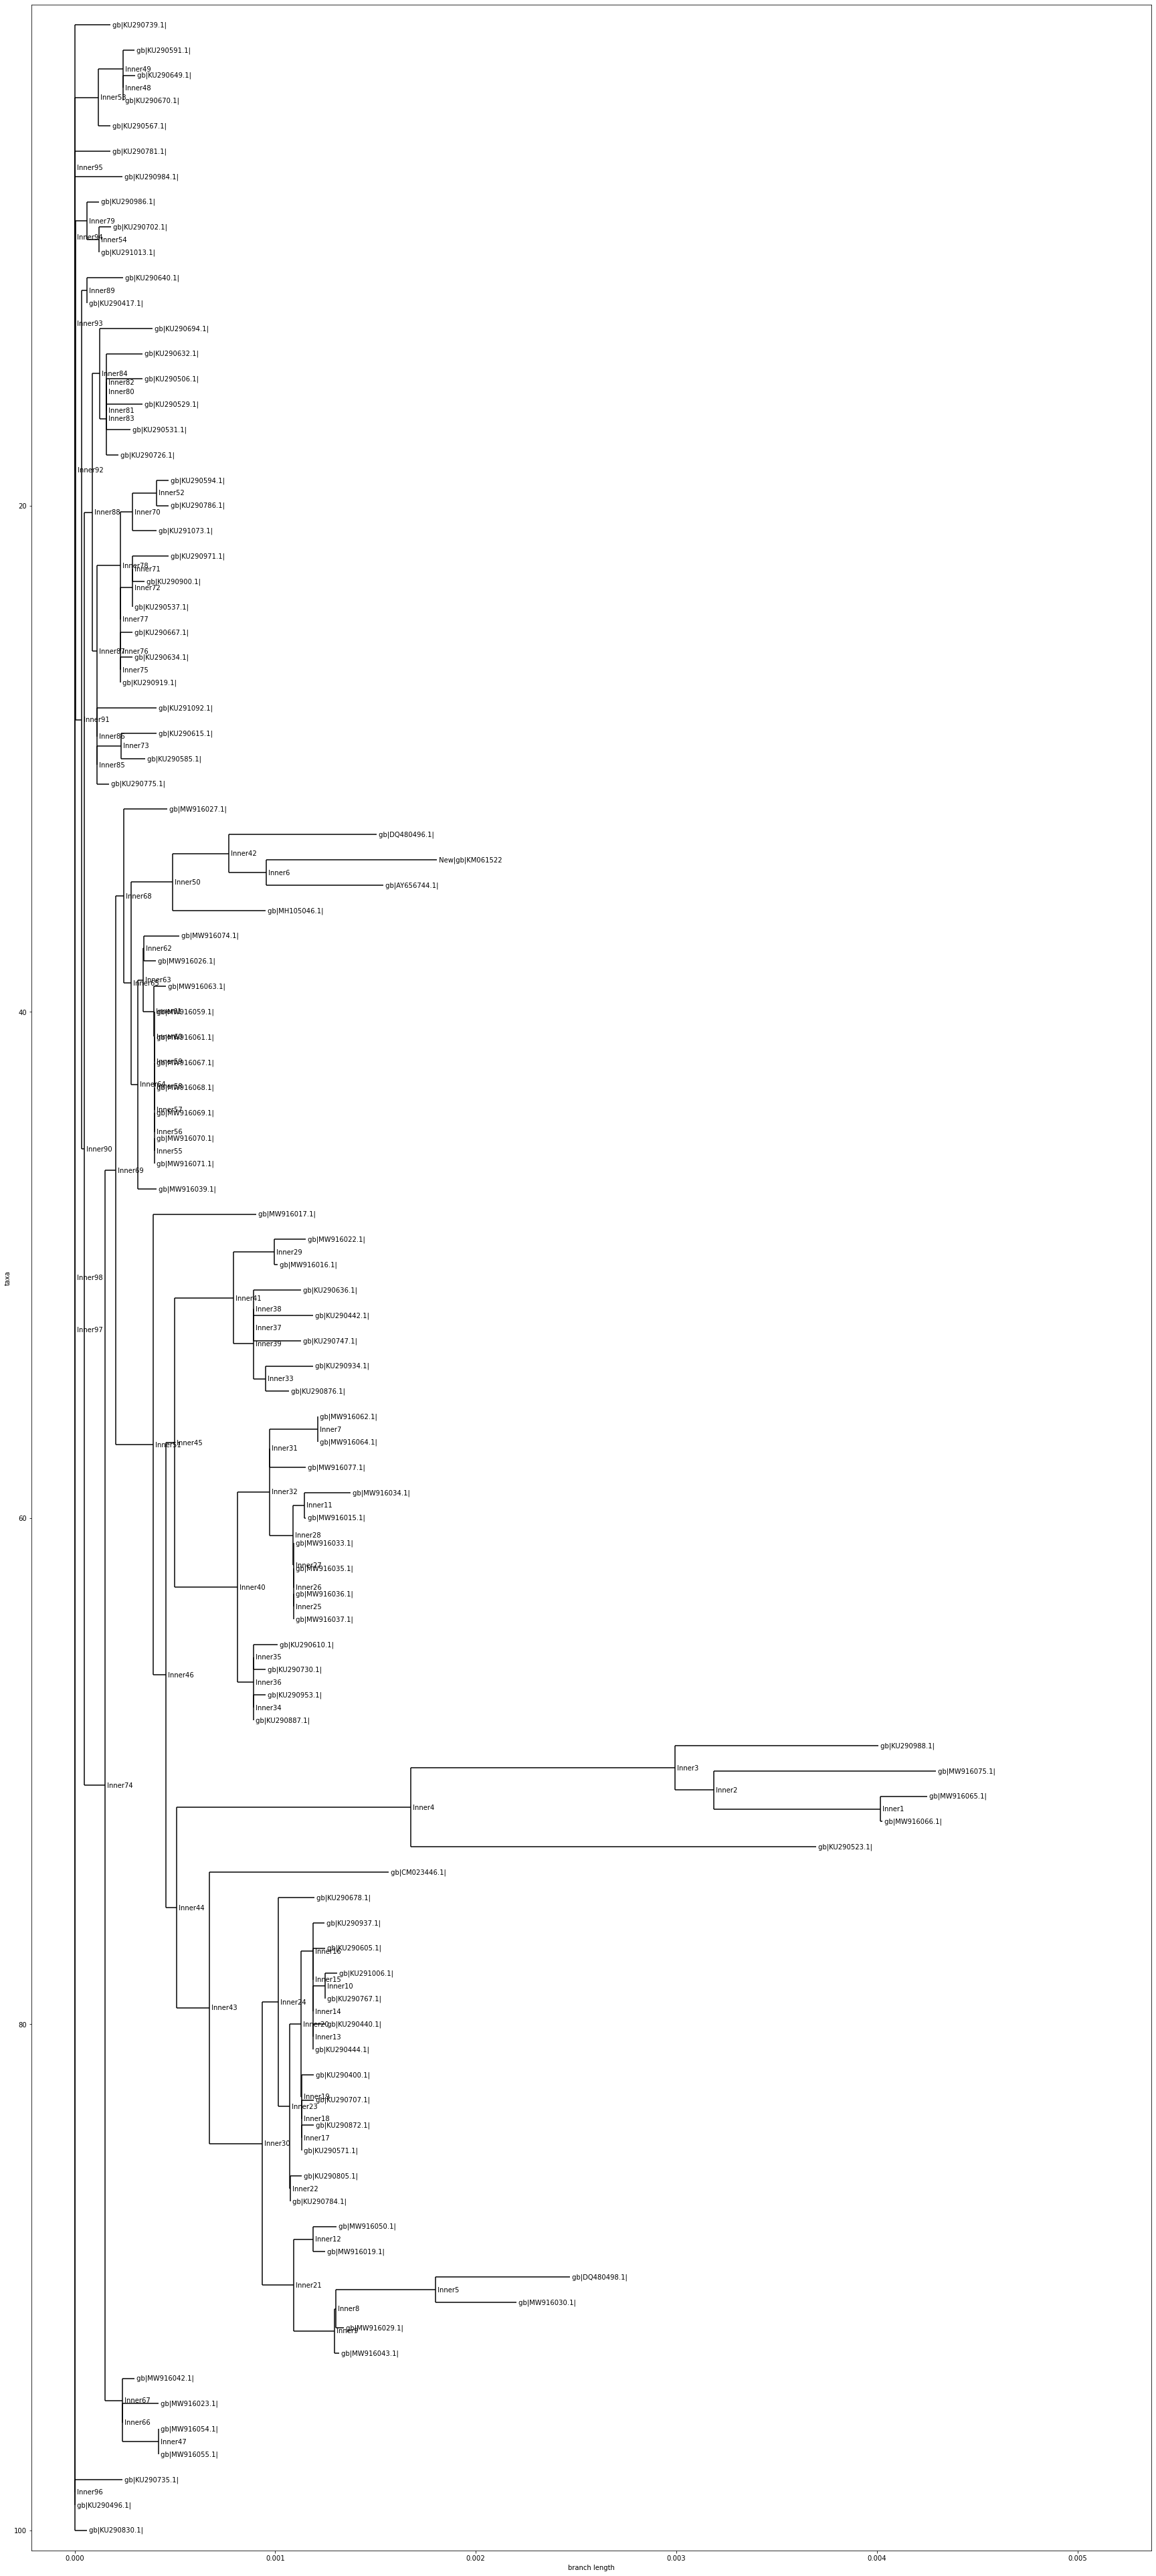

In [7]:
fig,axes = plt.subplots(1,1,figsize=(30,70))

nj_tree = constructor.nj(dm)

Phylo.draw(nj_tree, axes=axes)

In [13]:
# Clade to look at is name='Inner6' in NJ

# New|gb|AY656744.1| - Mystery

# gb|KM061522.1| - Match (Inner 6)

# gb|DQ480496.1| - Another potential competitor (inner 42)

In [13]:
print(nj_tree)

Tree(rooted=False)
    Clade(branch_length=0, name='Inner98')
        Clade(branch_length=0.00017905102954340803, name='gb|KU290739.1|')
        Clade(branch_length=1.9244588561617704e-17, name='Inner97')
            Clade(branch_length=2.258537563328884e-07, name='Inner95')
                Clade(branch_length=0.00011914149927262604, name='Inner53')
                    Clade(branch_length=0.00012029991047447, name='Inner49')
                        Clade(branch_length=5.849000298417819e-05, name='gb|KU290591.1|')
                        Clade(branch_length=1.1936735303099484e-06, name='Inner48')
                            Clade(branch_length=5.9683676514448564e-05, name='gb|KU290649.1|')
                            Clade(branch_length=-1.5937771935536915e-17, name='gb|KU290670.1|')
                    Clade(branch_length=5.875111906891115e-05, name='gb|KU290567.1|')
                Clade(branch_length=2.404249664184169e-07, name='Inner94')
                    Clade(branch_length=0.000

In [15]:
# Testing the selection to mystery seq and its closest seq match from tree

In [14]:
testing=[i for i in AlignIO.read(msa, "clustal")]
len(testing)

100

In [15]:
target_aln = testing[-7]

In [16]:
target_aln.id

'New|gb|KM061522'

In [17]:
target_aln.seq

Seq('GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAAGATGAGTCGC...TAA')

In [18]:
# Initialise list for sequences of interest
seqs_to_comp = []

In [19]:
# Attempting to append the sequence closest to mystery sequence into new file

for target in testing:
    if target.id=="New|gb|KM061522":
        seqs_to_comp.append(target)

for target in testing:
    if target.id=="gb|AY656744.1|":
        seqs_to_comp.append(target)
        

#for target in testing:
#    if target.id=="gb|DQ480496.1|":
#        seqs_to_comp.append(target)
        

In [ ]:
# Writing the new sequence pair to a new output file
#SeqIO.write(seqs_to_comp, "C:\Users\neil_\Documents\GitHub\dog-genomics\output\seqs_to_comp.fasta", "fasta") 

In [20]:
# Check if list populated
len(seqs_to_comp)

2

In [21]:
# See our list
seqs_to_comp

[SeqRecord(seq=Seq('GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAAGATGAGTCGC...TAA'), id='New|gb|KM061522', name='<unknown name>', description='New|gb|KM061522', dbxrefs=[]),
 SeqRecord(seq=Seq('GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAAGATGAGTCGC...TAA'), id='gb|AY656744.1|', name='<unknown name>', description='gb|AY656744.1|', dbxrefs=[])]

In [24]:
# Numpy array building from the distance matrix 

In [25]:
bpdm = np.array(dm)

In [26]:
bpdm

array([[0.00000000e+00, 1.31304088e-03, 1.37272456e-03, ...,
        4.77469412e-03, 4.77469412e-03, 4.59564309e-03],
       [1.31304088e-03, 0.00000000e+00, 5.96836765e-05, ...,
        4.35690839e-03, 4.17785736e-03, 4.11817368e-03],
       [1.37272456e-03, 5.96836765e-05, 0.00000000e+00, ...,
        4.41659206e-03, 4.23754103e-03, 4.11817368e-03],
       ...,
       [4.77469412e-03, 4.35690839e-03, 4.41659206e-03, ...,
        0.00000000e+00, 2.14861235e-03, 2.26797971e-03],
       [4.77469412e-03, 4.17785736e-03, 4.23754103e-03, ...,
        2.14861235e-03, 0.00000000e+00, 2.32766338e-03],
       [4.59564309e-03, 4.11817368e-03, 4.11817368e-03, ...,
        2.26797971e-03, 2.32766338e-03, 0.00000000e+00]])

In [27]:
#names = np.array(dm.names)
#matrix = np.array(dm.matrix)

In [28]:
# numpy.argmin suggestion, or numpy.amin returns minimum values along a given axis. Needs to be edited, only index no. returned

index_array = np.argmin(bpdm)

# Maybe index array a[-1:]

print(index_array)

0


In [29]:
# Smallest distance found, but between what?
sml_dst = np.min(bpdm[np.nonzero(bpdm)])

sml_dst

5.9683676514432626e-05

In [30]:
# Pandas dataframe attempts

In [22]:
dm

DistanceMatrix(names=['gb|CM023446.1|', 'gb|MW916043.1|', 'gb|MW916029.1|', 'gb|MW916019.1|', 'gb|MW916050.1|', 'gb|MW916030.1|', 'gb|DQ480498.1|', 'gb|KU290784.1|', 'gb|KU290805.1|', 'gb|KU290571.1|', 'gb|KU290872.1|', 'gb|KU290707.1|', 'gb|KU290400.1|', 'gb|KU290444.1|', 'gb|KU290937.1|', 'gb|KU290605.1|', 'gb|KU290440.1|', 'gb|KU290767.1|', 'gb|KU291006.1|', 'gb|KU290678.1|', 'gb|MW916055.1|', 'gb|MW916054.1|', 'gb|MW916042.1|', 'gb|MW916023.1|', 'gb|MW916039.1|', 'gb|MW916071.1|', 'gb|MW916070.1|', 'gb|MW916069.1|', 'gb|MW916068.1|', 'gb|MW916067.1|', 'gb|MW916061.1|', 'gb|MW916059.1|', 'gb|MW916063.1|', 'gb|MW916026.1|', 'gb|MW916074.1|', 'gb|MW916027.1|', 'gb|MH105046.1|', 'gb|MW916017.1|', 'gb|AY656744.1|', 'gb|KU290496.1|', 'gb|KU290830.1|', 'gb|KU290417.1|', 'gb|KU290775.1|', 'gb|KU291013.1|', 'gb|KU290702.1|', 'gb|KU290986.1|', 'gb|KU290726.1|', 'gb|KU290531.1|', 'gb|KU290640.1|', 'gb|KU290567.1|', 'gb|KU290781.1|', 'gb|KU290919.1|', 'gb|KU290667.1|', 'gb|KU290634.1|', 'gb|KU

In [8]:
# Dodgy dataframe, appending all the distances into a list for pandas 

distances = []

for dislst in dm.matrix:
      distances.append(dislst)
        
#names = []    

#for ids in dm.names:
#    names.append(ids)

dstmtxDF = pd.DataFrame(distances)


In [9]:
# Replace all 0.0000 with nan

dstmtxDF.replace(0.000000, np.nan, inplace=True)

In [10]:
dstmtxDF

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.001313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.001373,0.000060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.001432,0.000358,0.000418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.001492,0.000418,0.000477,0.000179,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.004476,0.004058,0.004058,0.003939,0.003999,0.004954,0.005133,0.003641,0.003700,0.003700,...,0.003939,0.003999,0.003999,0.005192,0.004834,NaN,NaN,NaN,NaN,NaN
96,0.004596,0.004118,0.004178,0.004118,0.004178,0.004834,0.005133,0.004178,0.004238,0.004238,...,0.004058,0.004118,0.004118,0.005133,0.004655,0.004476,NaN,NaN,NaN,NaN
97,0.004775,0.004357,0.004417,0.004357,0.004417,0.004894,0.005013,0.004417,0.004476,0.004476,...,0.004297,0.004357,0.004357,0.005252,0.004834,0.004715,0.000239,NaN,NaN,NaN
98,0.004775,0.004178,0.004238,0.004297,0.004357,0.004894,0.005133,0.004476,0.004536,0.004417,...,0.004357,0.004417,0.004417,0.005431,0.004834,0.004775,0.001970,0.002149,NaN,NaN


In [9]:
#dstmtxDF.transpose()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.001313,0.001373,0.001432,0.001492,0.001791,0.001970,0.001492,0.001552,0.001552,...,0.001850,0.001910,0.001910,0.002387,0.002208,0.004476,0.004596,0.004775,0.004775,0.004596
1,NaN,0.000000,0.000060,0.000358,0.000418,0.000955,0.001194,0.000418,0.000477,0.000358,...,0.001373,0.001432,0.001432,0.002686,0.002328,0.004058,0.004118,0.004357,0.004178,0.004118
2,NaN,NaN,0.000000,0.000418,0.000477,0.000895,0.001253,0.000418,0.000477,0.000358,...,0.001432,0.001492,0.001492,0.002745,0.002387,0.004058,0.004178,0.004417,0.004238,0.004118
3,NaN,NaN,NaN,0.000000,0.000179,0.001313,0.001552,0.000537,0.000597,0.000597,...,0.001253,0.001313,0.001313,0.002686,0.002208,0.003939,0.004118,0.004357,0.004297,0.004118
4,NaN,NaN,NaN,NaN,0.000000,0.001373,0.001611,0.000597,0.000657,0.000657,...,0.001313,0.001373,0.001373,0.002745,0.002268,0.003999,0.004178,0.004417,0.004357,0.004178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.004476,0.004715,0.004775,0.004238
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000239,0.001970,0.002029
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.002149,0.002268
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.002328


In [11]:
dstmtxDF.columns = dm.names

#distmatDF = distmatDF.set_index('seq_id')

#distmatDF['New|gb|KM061522'] = distmatDF['New|gb|KM061522'].replace(0, 100, inplace = True)
#np.nanmin(distmatDF['New|gb|KM061522'].values)

In [13]:
dstmtxDF['seq_id'] = dm.names

In [14]:
dstmtxDF

,gb|CM023446.1|,gb|MW916043.1|,gb|MW916029.1|,gb|MW916019.1|,gb|MW916050.1|,gb|MW916030.1|,gb|DQ480498.1|,gb|KU290784.1|,gb|KU290805.1|,gb|KU290571.1|,...,gb|MW916064.1|,gb|MW916062.1|,New|gb|KM061522,gb|DQ480496.1|,gb|KU290523.1|,gb|MW916066.1|,gb|MW916065.1|,gb|MW916075.1|,gb|KU290988.1|,seq_id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gb|CM023446.1|
1,0.001313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gb|MW916043.1|
2,0.001373,0.000060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gb|MW916029.1|
3,0.001432,0.000358,0.000418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gb|MW916019.1|
4,0.001492,0.000418,0.000477,0.000179,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gb|MW916050.1|
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.004476,0.004058,0.004058,0.003939,0.003999,0.004954,0.005133,0.003641,0.003700,0.003700,...,0.003999,0.003999,0.005192,0.004834,NaN,NaN,NaN,NaN,NaN,gb|KU290523.1|
96,0.004596,0.004118,0.004178,0.004118,0.004178,0.004834,0.005133,0.004178,0.004238,0.004238,...,0.004118,0.004118,0.005133,0.004655,0.004476,NaN,NaN,NaN,NaN,gb|MW916066.1|
97,0.004775,0.004357,0.004417,0.004357,0.004417,0.004894,0.005013,0.004417,0.004476,0.004476,...,0.004357,0.004357,0.005252,0.004834,0.004715,0.000239,NaN,NaN,NaN,gb|MW916065.1|
98,0.004775,0.004178,0.004238,0.004297,0.004357,0.004894,0.005133,0.004476,0.004536,0.004417,...,0.004417,0.004417,0.005431,0.004834,0.004775,0.001970,0.002149,NaN,NaN,gb|MW916075.1|


In [15]:
# Set ID as index column

orgDF = dstmtxDF.set_index("seq_id")

In [16]:
type(orgDF)

pandas.core.frame.DataFrame

In [17]:
orgDF

,gb|CM023446.1|,gb|MW916043.1|,gb|MW916029.1|,gb|MW916019.1|,gb|MW916050.1|,gb|MW916030.1|,gb|DQ480498.1|,gb|KU290784.1|,gb|KU290805.1|,gb|KU290571.1|,...,gb|MW916077.1|,gb|MW916064.1|,gb|MW916062.1|,New|gb|KM061522,gb|DQ480496.1|,gb|KU290523.1|,gb|MW916066.1|,gb|MW916065.1|,gb|MW916075.1|,gb|KU290988.1|
seq_id,,,,,,,,,,,,,,,,,,,,,
gb|CM023446.1|,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gb|MW916043.1|,0.001313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gb|MW916029.1|,0.001373,0.000060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gb|MW916019.1|,0.001432,0.000358,0.000418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gb|MW916050.1|,0.001492,0.000418,0.000477,0.000179,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gb|KU290523.1|,0.004476,0.004058,0.004058,0.003939,0.003999,0.004954,0.005133,0.003641,0.003700,0.003700,...,0.003939,0.003999,0.003999,0.005192,0.004834,NaN,NaN,NaN,NaN,NaN
gb|MW916066.1|,0.004596,0.004118,0.004178,0.004118,0.004178,0.004834,0.005133,0.004178,0.004238,0.004238,...,0.004058,0.004118,0.004118,0.005133,0.004655,0.004476,NaN,NaN,NaN,NaN
gb|MW916065.1|,0.004775,0.004357,0.004417,0.004357,0.004417,0.004894,0.005013,0.004417,0.004476,0.004476,...,0.004297,0.004357,0.004357,0.005252,0.004834,0.004715,0.000239,NaN,NaN,NaN


In [17]:
min_to_search = orgDF[orgDF['New|gb|KM061522'] != 0]['New|gb|KM061522'].min()
orgDF[orgDF['New|gb|KM061522'] == min_to_search]['New|gb|KM061522']

seq_id
gb|DQ480496.1|    0.00185
Name: New|gb|KM061522, dtype: float64

In [22]:
# Testing out new transposed df, unfortunately its the same as if not tp

subset = orgDF['New|gb|KM061522'].reset_index()
subset[subset['seq_id'] == 'gb|AY656744.1|']

,seq_id,New|gb|KM061522
38,gb|AY656744.1|,NaN


In [23]:
subset = orgDF['New|gb|KM061522'].reset_index()
subset[subset['seq_id'] == 'gb|DQ480496.1|']

,seq_id,New|gb|KM061522
94,gb|DQ480496.1|,0.00185


In [24]:
# Test it another way round

subset = orgDF['gb|AY656744.1|'].reset_index()
subset[subset['seq_id'] == 'New|gb|KM061522']

,seq_id,gb|AY656744.1|
93,New|gb|KM061522,0.001432


In [25]:
subset = orgDF['gb|DQ480496.1|'].reset_index()
subset[subset['seq_id'] == 'New|gb|KM061522']

,seq_id,gb|DQ480496.1|
93,New|gb|KM061522,NaN


In [21]:
orgDF['closest_dist'] = orgDF.idxmin(axis=1)

TypeError: reduction operation 'argmin' not allowed for this dtype

In [22]:
orgDF

,gb|CM023446.1|,gb|MW916043.1|,gb|MW916029.1|,gb|MW916019.1|,gb|MW916050.1|,gb|MW916030.1|,gb|DQ480498.1|,gb|KU290784.1|,gb|KU290805.1|,gb|KU290571.1|,...,gb|MW916064.1|,gb|MW916062.1|,New|gb|KM061522,gb|DQ480496.1|,gb|KU290523.1|,gb|MW916066.1|,gb|MW916065.1|,gb|MW916075.1|,gb|KU290988.1|,closest_dist
seq_id,,,,,,,,,,,,,,,,,,,,,
gb|CM023446.1|,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gb|MW916043.1|,0.001313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gb|CM023446.1|
gb|MW916029.1|,0.001373,0.000060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gb|MW916043.1|
gb|MW916019.1|,0.001432,0.000358,0.000418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gb|MW916043.1|
gb|MW916050.1|,0.001492,0.000418,0.000477,0.000179,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gb|MW916019.1|
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gb|KU290523.1|,0.004476,0.004058,0.004058,0.003939,0.003999,0.004954,0.005133,0.003641,0.003700,0.003700,...,0.003999,0.003999,0.005192,0.004834,NaN,NaN,NaN,NaN,NaN,gb|KU290887.1|
gb|MW916066.1|,0.004596,0.004118,0.004178,0.004118,0.004178,0.004834,0.005133,0.004178,0.004238,0.004238,...,0.004118,0.004118,0.005133,0.004655,0.004476,NaN,NaN,NaN,NaN,gb|MW916016.1|
gb|MW916065.1|,0.004775,0.004357,0.004417,0.004357,0.004417,0.004894,0.005013,0.004417,0.004476,0.004476,...,0.004357,0.004357,0.005252,0.004834,0.004715,0.000239,NaN,NaN,NaN,gb|MW916066.1|


In [23]:
orgDF[-7:]

,gb|CM023446.1|,gb|MW916043.1|,gb|MW916029.1|,gb|MW916019.1|,gb|MW916050.1|,gb|MW916030.1|,gb|DQ480498.1|,gb|KU290784.1|,gb|KU290805.1|,gb|KU290571.1|,...,gb|MW916064.1|,gb|MW916062.1|,New|gb|KM061522,gb|DQ480496.1|,gb|KU290523.1|,gb|MW916066.1|,gb|MW916065.1|,gb|MW916075.1|,gb|KU290988.1|,closest_dist
seq_id,,,,,,,,,,,,,,,,,,,,,
New|gb|KM061522,0.002387,0.002686,0.002745,0.002686,0.002745,0.002447,0.002566,0.002626,0.002686,0.002686,...,0.002626,0.002626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gb|AY656744.1|
gb|DQ480496.1|,0.002208,0.002328,0.002387,0.002208,0.002268,0.002686,0.002507,0.002387,0.002447,0.002447,...,0.002208,0.002208,0.001850,NaN,NaN,NaN,NaN,NaN,NaN,gb|MW916071.1|
gb|KU290523.1|,0.004476,0.004058,0.004058,0.003939,0.003999,0.004954,0.005133,0.003641,0.003700,0.003700,...,0.003999,0.003999,0.005192,0.004834,NaN,NaN,NaN,NaN,NaN,gb|KU290887.1|
gb|MW916066.1|,0.004596,0.004118,0.004178,0.004118,0.004178,0.004834,0.005133,0.004178,0.004238,0.004238,...,0.004118,0.004118,0.005133,0.004655,0.004476,NaN,NaN,NaN,NaN,gb|MW916016.1|
gb|MW916065.1|,0.004775,0.004357,0.004417,0.004357,0.004417,0.004894,0.005013,0.004417,0.004476,0.004476,...,0.004357,0.004357,0.005252,0.004834,0.004715,0.000239,NaN,NaN,NaN,gb|MW916066.1|
gb|MW916075.1|,0.004775,0.004178,0.004238,0.004297,0.004357,0.004894,0.005133,0.004476,0.004536,0.004417,...,0.004417,0.004417,0.005431,0.004834,0.004775,0.001970,0.002149,NaN,NaN,gb|MW916066.1|
gb|KU290988.1|,0.004596,0.004118,0.004118,0.004118,0.004178,0.004775,0.005133,0.003700,0.003760,0.003760,...,0.004417,0.004417,0.005372,0.005013,0.004238,0.002029,0.002268,0.002328,NaN,gb|MW916066.1|


In [31]:
mystery_match = orgDF.loc["New|gb|KM061522", "closest_dist"]

In [34]:
print(f"The closest related dog to our mystery sequence is: {mystery_match}")

The closest related dog to our mystery sequence is: gb|AY656744.1|


In [32]:
minValue = orgDF['New|gb|KM061522'].min()

In [33]:
minValue

0.0

In [37]:
orgDF.idxmin() 

gb|CM023446.1|    gb|CM023446.1|
gb|MW916043.1|    gb|MW916043.1|
gb|MW916029.1|    gb|MW916029.1|
gb|MW916019.1|    gb|MW916019.1|
gb|MW916050.1|    gb|MW916050.1|
                       ...      
gb|KU290523.1|    gb|KU290523.1|
gb|MW916066.1|    gb|MW916066.1|
gb|MW916065.1|    gb|MW916065.1|
gb|MW916075.1|    gb|MW916075.1|
gb|KU290988.1|    gb|KU290988.1|
Length: 100, dtype: object

In [28]:
print(orgDF.loc[:,"New|gb|KM061522"]) 

seq_id
gb|CM023446.1|         NaN
gb|MW916043.1|         NaN
gb|MW916029.1|         NaN
gb|MW916019.1|         NaN
gb|MW916050.1|         NaN
                    ...   
gb|KU290523.1|    0.005192
gb|MW916066.1|    0.005133
gb|MW916065.1|    0.005252
gb|MW916075.1|    0.005431
gb|KU290988.1|    0.005372
Name: New|gb|KM061522, Length: 100, dtype: float64


In [16]:
#distmatDF['New|gb|KM061522'] = distmatDF['New|gb|KM061522'].replace(0, 100, inplace = True)
min_to_search = dstmtxDF[dstmtxDF['New|gb|KM061522'] != 0]['New|gb|KM061522'].min()
dstmtxDF[dstmtxDF['New|gb|KM061522'] == min_to_search]['New|gb|KM061522']

94    0.00185
Name: New|gb|KM061522, dtype: float64

In [30]:
#dstmtxDF.transpose()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
gb|CM023446.1|,0.0,0.001313,0.001373,0.001432,0.001492,0.001791,0.00197,0.001492,0.001552,0.001552,...,0.00185,0.00191,0.00191,0.002387,0.002208,0.004476,0.004596,0.004775,0.004775,0.004596
gb|MW916043.1|,NaN,0.0,0.00006,0.000358,0.000418,0.000955,0.001194,0.000418,0.000477,0.000358,...,0.001373,0.001432,0.001432,0.002686,0.002328,0.004058,0.004118,0.004357,0.004178,0.004118
gb|MW916029.1|,NaN,NaN,0.0,0.000418,0.000477,0.000895,0.001253,0.000418,0.000477,0.000358,...,0.001432,0.001492,0.001492,0.002745,0.002387,0.004058,0.004178,0.004417,0.004238,0.004118
gb|MW916019.1|,NaN,NaN,NaN,0.0,0.000179,0.001313,0.001552,0.000537,0.000597,0.000597,...,0.001253,0.001313,0.001313,0.002686,0.002208,0.003939,0.004118,0.004357,0.004297,0.004118
gb|MW916050.1|,NaN,NaN,NaN,NaN,0.0,0.001373,0.001611,0.000597,0.000657,0.000657,...,0.001313,0.001373,0.001373,0.002745,0.002268,0.003999,0.004178,0.004417,0.004357,0.004178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gb|MW916066.1|,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000239,0.00197,0.002029
gb|MW916065.1|,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.002149,0.002268
gb|MW916075.1|,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.002328
gb|KU290988.1|,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [31]:
#dstmtxDF.columns = dstmtxDF.iloc[-1]

In [32]:
dstmtxDF

99,0.004595643091614421,0.004118173679498627,0.004118173679498627,0.004118173679498627,0.00417785735601317,0.00477469412115783,0.0051327961802446476,0.0037003879438973764,0.003760071620411809,0.003760071620411809,...,0.004416592062071012,0.004416592062071012,0.0053715308863026,0.005013428827215782,0.004237541032527603,0.0020292450014920416,0.002267979707549994,0.0023276633840644267,0.0,gb|KU290988.1|
0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gb|CM023446.1|
1,0.001313,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gb|MW916043.1|
2,0.001373,0.000060,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gb|MW916029.1|
3,0.001432,0.000358,0.000418,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gb|MW916019.1|
4,0.001492,0.000418,0.000477,0.000179,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gb|MW916050.1|
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.004476,0.004058,0.004058,0.003939,0.003999,0.004954,0.005133,0.003641,0.003700,0.003700,...,0.003999,0.003999,0.005192,0.004834,0.000000,NaN,NaN,NaN,NaN,gb|KU290523.1|
96,0.004596,0.004118,0.004178,0.004118,0.004178,0.004834,0.005133,0.004178,0.004238,0.004238,...,0.004118,0.004118,0.005133,0.004655,0.004476,0.000000,NaN,NaN,NaN,gb|MW916066.1|
97,0.004775,0.004357,0.004417,0.004357,0.004417,0.004894,0.005013,0.004417,0.004476,0.004476,...,0.004357,0.004357,0.005252,0.004834,0.004715,0.000239,0.000000,NaN,NaN,gb|MW916065.1|
98,0.004775,0.004178,0.004238,0.004297,0.004357,0.004894,0.005133,0.004476,0.004536,0.004417,...,0.004417,0.004417,0.005431,0.004834,0.004775,0.001970,0.002149,0.000000,NaN,gb|MW916075.1|


In [83]:
subset = distmatDF['New|gb|KM061522'].reset_index()
subset[subset['seq_id'] == 'gb|AY656744.1|']

,seq_id,New|gb|KM061522
38,gb|AY656744.1|,NaN


In [92]:


distmatDF[distmatDF['seq_id'] == 'gb|AY656744.1|']['New|gb|KM061522']

38   NaN
Name: New|gb|KM061522, dtype: float64

seq_id
gb|CM023446.1|    None
gb|MW916043.1|    None
gb|MW916029.1|    None
gb|MW916019.1|    None
gb|MW916050.1|    None
                  ... 
gb|KU290523.1|    None
gb|MW916066.1|    None
gb|MW916065.1|    None
gb|MW916075.1|    None
gb|KU290988.1|    None
Name: New|gb|KM061522, Length: 100, dtype: object

In [61]:
type(distmatDF['New|gb|KM061522'].values)

numpy.ndarray

In [51]:
len(dm.names)

100

In [1]:
len(dm.matrix)

NameError: name 'dm' is not defined

In [32]:
# Build upgma tree

#fig,axes = plt.subplots(1,1,figsize=(30,70))
#upgma_tree = constructor.upgma(dm)
#Phylo.draw(upgma_tree, axes=axes)

In [33]:
# messing around with clades

def get_parent(tree, child_clade):
    node_path = nj_tree.get_path(child_clade)
    return node_path[-2]

# Select a clade
myclade = nj_tree.find_clades("Inner6")
# Test the function
parent = get_parent(nj_tree, myclade)
assert myclade in parent

ValueError: <filter object at 0x000002C0414D6460> (type <class 'filter'>) is not a valid type for comparison.

In [4]:
# Load target sequence data and parse FASTA just so we know what to look for later

for target_seq in SeqIO.parse("../data/mystery.fa", "fasta"):
    print(target_seq.id)
    print(repr(target_seq.seq))
    print(len(target_seq))

gb|KM061522.1|
Seq('GTTAATGTAGCTTAATTAATAAAGCAAGGCACTGAAAATGCCAAGATGAGTCGC...TAA')
16735


In [ ]:
# Tree building test

Phylo.write(tree, "xxx.xxx", "Newick")

# Have a look and nodes and leaves of your tree

tree.get_nonterminals()
tree.get_terminals()

In [ ]:
# Return the maximum length of the alignment
aln_len = read_aln.get_alignment_length()

# test if alignment length is >0, check if there are any alignments in file, assert error if <2 rows
aln_len

In [ ]:
# Misc notes and extra bits


# Parse fasta file with handler
#count = 0
#with open ("../data/dog_breeds.fa") as handle:
#    for seq_id, seq in SimpleFastaParser(handle):
#        print(count)